In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = np.where((df['weight'] / (0.01*df['height'])**2).values > 25,1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x ==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x ==1 else 1)


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    df_cat_copy = df_cat

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    

    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot(
        x = 'variable',
        data = df_cat_copy,
        col = 'cardio',
        kind = 'count',
        hue = "value"
    )
    graph.set_ylabels('total')
    fig = graph.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
     (df['height'] >= df['height'].quantile(0.025)) &
     (df['height'] <= df['height'].quantile(0.975)) &
     (df['weight'] >= df['weight'].quantile(0.025)) &
     (df['weight'] <= df['weight'].quantile(0.975))
    ]


    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr) 

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(9, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, mask=mask, vmax=.8, center=0.09, square=True, cbar_kws = {'shrink':0.5}, annot=True, fmt='0.1f')

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


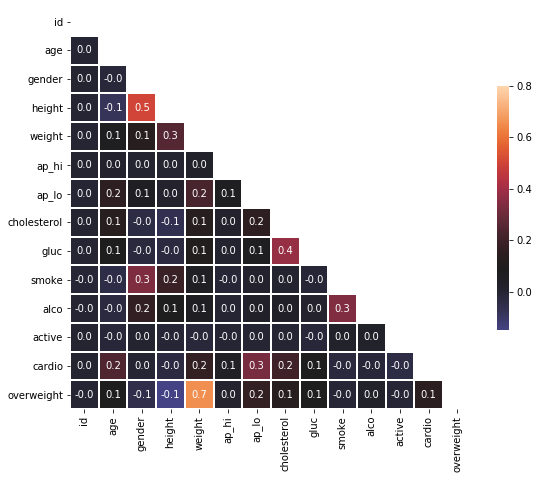

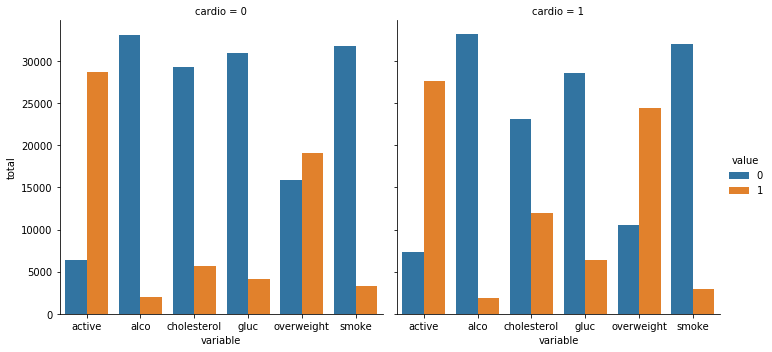

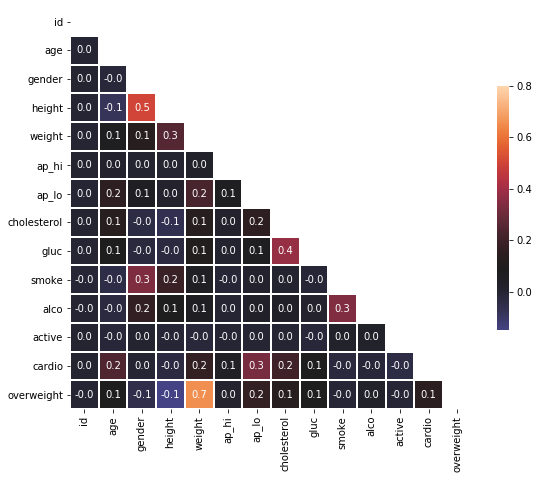

In [134]:
draw_cat_plot()
draw_heat_map()

##### =================================================================================================================
###### Test section
##### =================================================================================================================

In [86]:
df = pd.read_csv('medical_examination.csv')

In [88]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [89]:
df['overweight'] = np.where((df['weight'] / (df['height'] / 100 **2)).values > 25,1, 0)

In [90]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x ==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x ==1 else 1)

In [91]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [92]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [83]:
df_cat.head(5)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


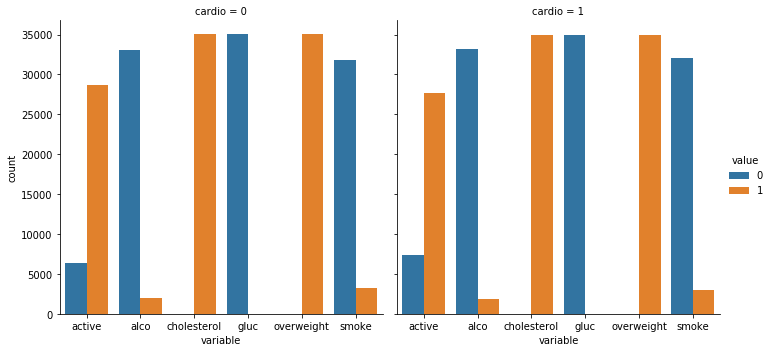

In [84]:
sns.catplot(
    x = 'variable',
    data = df_cat,
    col = 'cardio',
    kind = 'count',
    hue = "value",
)

In [93]:
df_cat.head(10)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


In [94]:
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

In [95]:
df_cat.head(5)

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


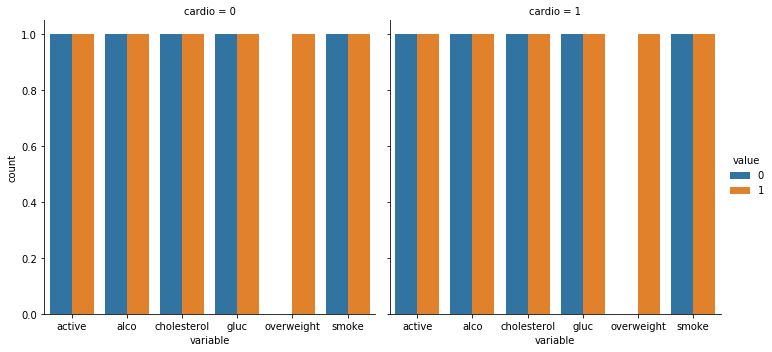

In [96]:
sns.catplot(
    x = 'variable',
    #y = 'total',
    data = df_cat,
    col = 'cardio',
    kind = 'count',
    hue = "value",
)

In [51]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,0,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,0,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,0,0,0,0,0,1


In [52]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))
            ]

In [53]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


In [54]:
df_heat.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,NaN,NaN,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,NaN,NaN,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,NaN,NaN,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,NaN,NaN,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,NaN,NaN,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,NaN,NaN,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,NaN,NaN,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,NaN,NaN,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [55]:
np.triu(df_heat.corr(), -1)

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,             nan,             nan,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 2.50729691e-03,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,             nan,             nan,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00, -1.81320052e-02,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02,             nan,             nan,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  5.05784851e-01,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02,             nan,    

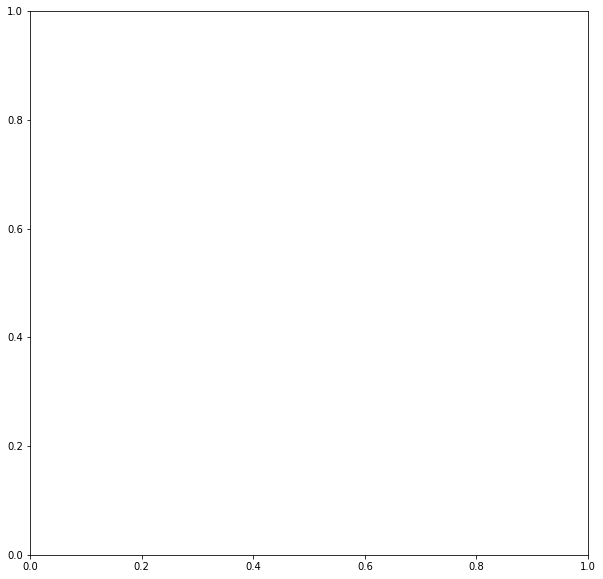

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))

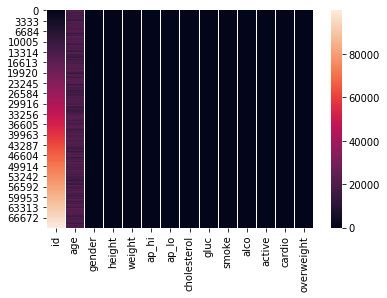

In [57]:
fig = sns.heatmap(df_heat)

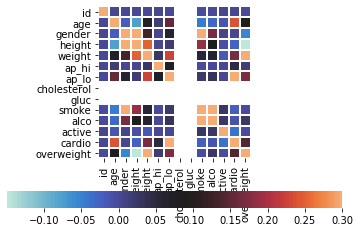

In [58]:
sns.heatmap(df_heat.corr(), linewidths=1, vmax=.3, center=0.09,square=True, cbar_kws = {'orientation' : 'horizontal'})

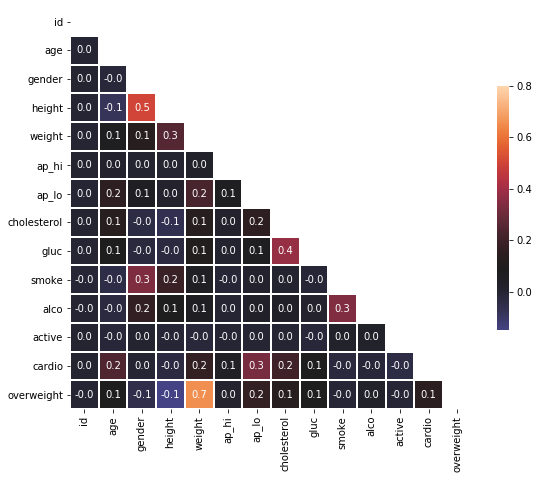

In [120]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
 (df['height'] >= df['height'].quantile(0.025)) &
 (df['height'] <= df['height'].quantile(0.975)) &
 (df['weight'] >= df['weight'].quantile(0.025)) &
 (df['weight'] <= df['weight'].quantile(0.975))
]


# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(corr) 


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, mask=mask, vmax=.8, center=0.09, square=True, cbar_kws = {'shrink':0.5}, annot=True, fmt='0.1f')


# Do not modify the next two lines
fig.savefig('heatmap.png')
